## 3-Sigma Technique (Standard Deviation)

    # Outliers are the most extremes values in the data. It is an abnormal observations that deviate from the norm.
    # Outliers do not fit in the normal behavior of the data.

***1. Detect Outliers using following methods***

    1. Boxplot
    2. Histogram
    3. Scatter plot
    4. Z-score
    5. Inter quartile range(values out of 1.5 time of IQR)

***2. Handle Outlier using following methods***

    1. Remove the outliers.
    2. Replace outlier with suitable values by using following
        methods:-
             • Quantile method
             • Inter quartile range
    3. Use that ML model which are not sensitive to outliers
             • Like:-KNN, Decision Tree, SVM, Naïve Bayes, Ensemble methods

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import seaborn as sns


In [59]:
# checking outliers from the below list
age1=[18,18,21,21,18,22,23,24,25,82,90,200,10000]
data1=pd.DataFrame(age1, columns=['Age'])
data1.head()


,Age
0,18
1,18
2,21
3,21
4,18


In [69]:
# Function to Detection Outlier on one-dimentional datasets.
def check_outliers_with_print(data):
    #define a list to accumlate anomalies
    list_of_outliers = []
    list_of_age_not_outliers=[]
    # Set upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(data)
    print('_data_std',random_data_std)
    random_data_mean = statistics.mean(data)
    print('_data_mean',random_data_mean)
    # 3-standard deviation
    
    outlier_cut_off = random_data_std * 3
    print('outlier_cut_off',outlier_cut_off)
    
    lower_limit  = random_data_mean - outlier_cut_off 
    print("lower_limit",lower_limit)
    upper_limit = random_data_mean + outlier_cut_off
    print("upper_limit",upper_limit)
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            list_of_outliers.append(outlier)
        else:
            list_of_age_not_outliers.append(outlier)
    print("list of not not outliers record",list_of_age_not_outliers)
    return list_of_outliers
   

In [70]:
# checking the possible outliers
print('list of ages',age1)
list_out=check_outliers_with_print(data1["Age"])
print("outliers list",list_out)

list of ages [18, 18, 21, 21, 18, 22, 23, 24, 25, 82, 90, 200, 10000]
_data_std 2761.003338624826
_data_mean 812.4615384615385
outlier_cut_off 8283.010015874479
lower_limit -7470.548477412941
upper_limit 9095.471554336018
list of not not outliers record [18, 18, 21, 21, 18, 22, 23, 24, 25, 82, 90, 200]
outliers list [10000]


In [27]:
# lets use the above same method to find outliers from the below dataset

data = pd.read_csv('data/EDA_01.csv')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,India,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Sri lanka,Female,41.0,1,73707.76,1,0,1,112542.58,0
2,3,15619304,Onio,502,India,Female,42.0,8,159660.70,3,1,0,113931.57,1
3,4,15701354,Boni,699,India,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Sri lanka,Female,43.0,2,135510.73,1,1,1,79084.10,0


In [71]:
# Function to Detection Outlier on one-dimentional datasets.
def check_outliers(data):
    #define a list to accumlate anomalies
    list_of_outliers = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    # 3-standard deviation
    
    outlier_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - outlier_cut_off 
    upper_limit = random_data_mean + outlier_cut_off
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            list_of_outliers.append(outlier)
    return list_of_outliers
    

In [30]:
# backward fill
# trying to handle missing data in age as well converting age into number(int) type
data['Age'] = data['Age'].bfill()
data['Age']=data['Age'].astype(dtype=int)

In [33]:
# check outliers by passing Age column
list_1 = check_outliers(data['Age'])
print("total Data : ",len(data))
print("total outliers found : ",len(list_1))

total Data :  10000
total outliers found :  136


***Checking Skewness***
    
    it is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean
    In simpler terms, it tells you whether the distribution of your data is skewed to the left or right.


## **Types of Skewness**:

**1. Positive Skew (Right Skew):** 

    The right tail (larger values) is longer or fatter than the left tail. The skewness value will be greater than 0.
**2. Negative Skew (Left Skew)**: 

    The left tail (smaller values) is longer or fatter than the right tail. The skewness value will be less than 0.
**3. Zero Skew**: 

    The data is perfectly symmetrical, or close to it. The skewness value will be around 0.

In [35]:
# check Skewness
data.Age.skew()

1.0159077891434327

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

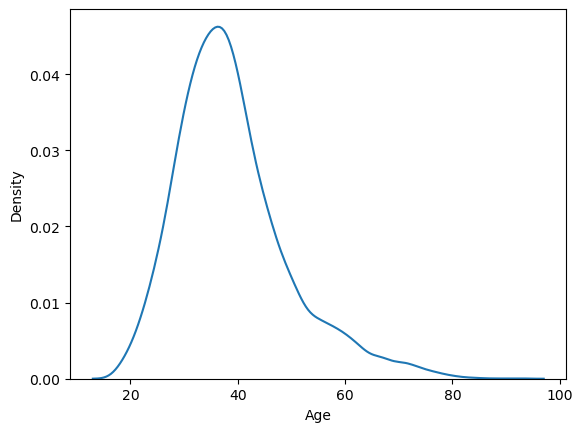

In [49]:
# using seaborn to plot
sns.kdeplot(data.Age)

In [72]:
# use logarithmic
data['Age_transformed'] = np.log(data.Age)
data['Age_transformed'].head()


0    3.737670
1    3.713572
2    3.737670
3    3.663562
4    3.761200
Name: Age_transformed, dtype: float64

In [73]:
# check skewness again after applying logarithmic
data.Age_transformed.skew()

0.18486452289665503

In [78]:
# check outliers after applying logarithmic
# list_2 = check_outliers(data.Age_transformed)
list_2 = check_outliers_with_print(data.Age_transformed)
print("list of outliers",list_2)
print("Outliers count",len(list_2))
print("overall data count",len(data))

_data_std 0.2588342155255357
_data_mean 3.627495962860577
outlier_cut_off 0.7765026465766072
lower_limit 2.85099331628397
upper_limit 4.403998609437185
list of not not outliers record [3.7376696182833684, 3.713572066704308, 3.7376696182833684, 3.6635616461296463, 3.7612001156935624, 3.784189633918261, 3.912023005428146, 3.367295829986474, 3.784189633918261, 3.295836866004329, 3.1780538303479458, 3.1780538303479458, 3.5263605246161616, 3.2188758248682006, 3.5553480614894135, 3.8066624897703196, 4.060443010546419, 3.8066624897703196, 3.8066624897703196, 3.713572066704308, 3.713572066704308, 3.828641396489095, 3.828641396489095, 3.828641396489095, 3.2188758248682006, 3.2188758248682006, 3.58351893845611, 3.784189633918261, 3.367295829986474, 3.367295829986474, 3.58351893845611, 3.58351893845611, 3.713572066704308, 3.4339872044851463, 3.4339872044851463, 3.4339872044851463, 3.4339872044851463, 3.4965075614664802, 3.58351893845611, 3.713572066704308, 3.6888794541139363, 3.6375861597263857, 

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age_transformed', ylabel='Density'>

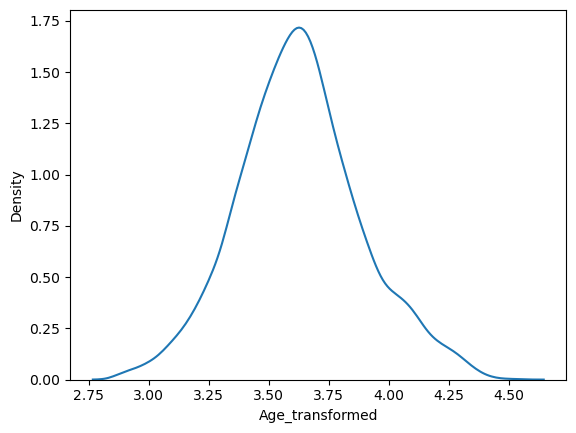

In [79]:
# plotting after applying lograthimic
sns.kdeplot(data.Age_transformed)